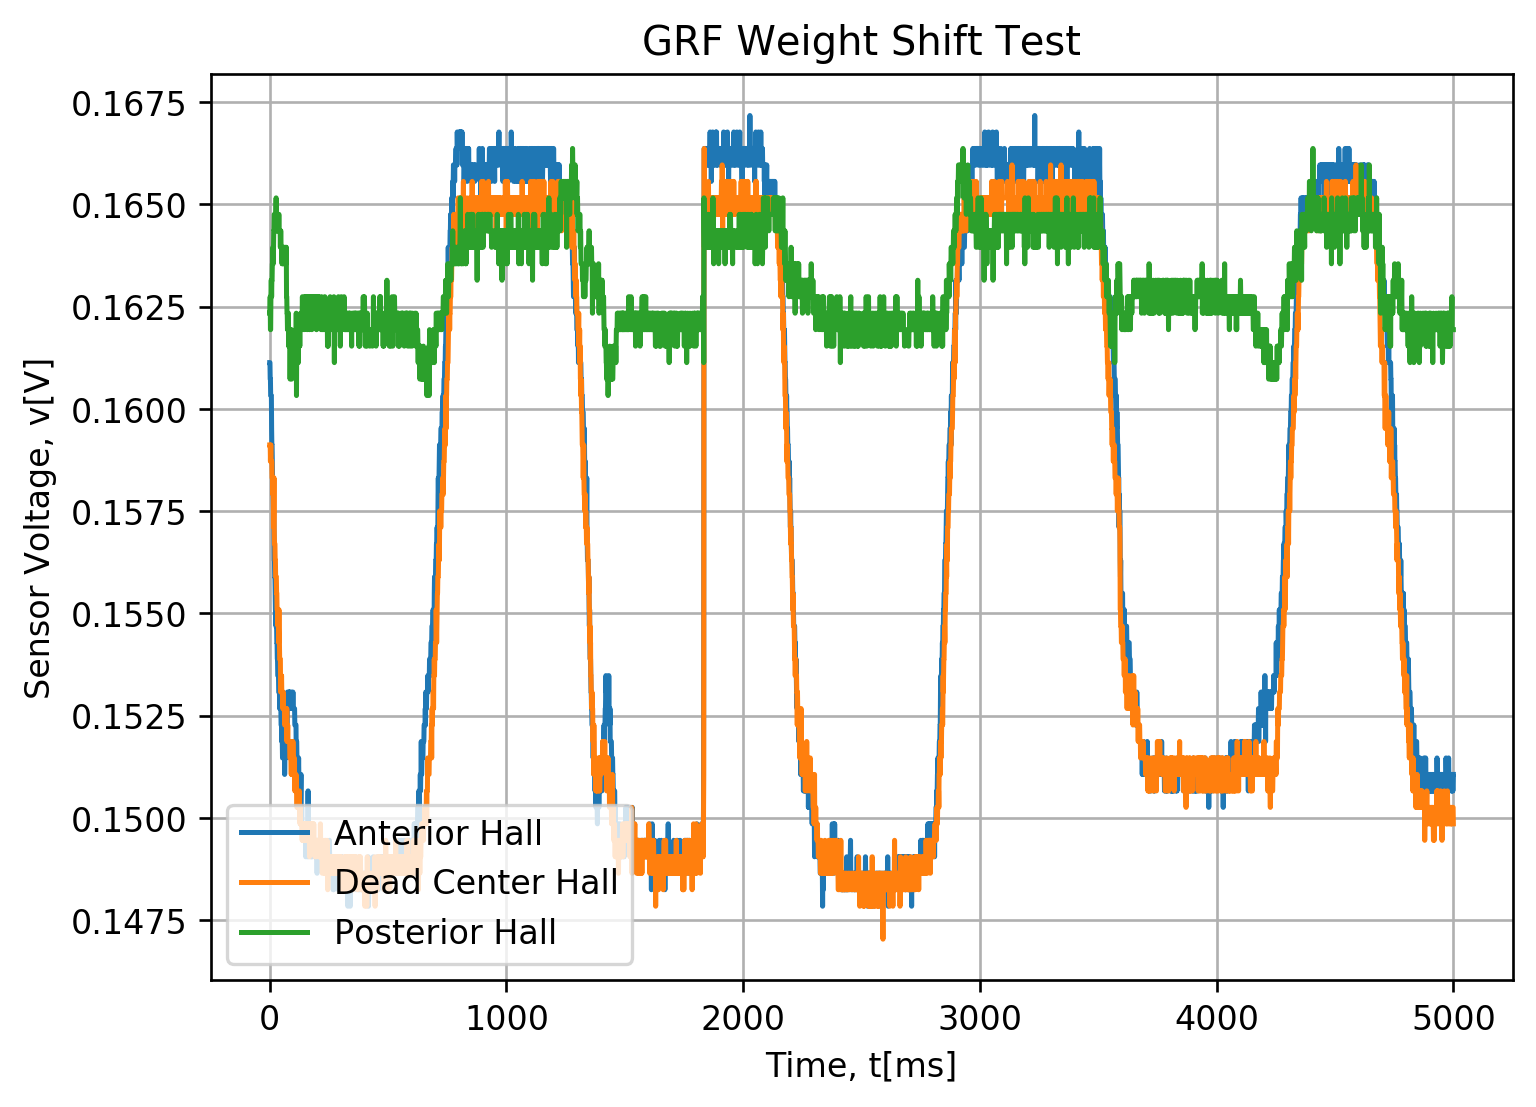

In [4]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

with open("SensorTrial_061119_0.txt", "r") as filestream:
    i = 0
    a0 = np.zeros(60000)
    a1 = np.zeros(60000)
    a2 = np.zeros(60000)
    for line in filestream:
        currentline = line.split(",")
        a0[i] = currentline[0]
        a1[i] = currentline[1]
        a2[i] = currentline[2]
        i += 1
        
#data to display
zero = 5000 #42200
cutoff = 10000#44200
noLoadIdx = 2500
#convert to array and change to volts
arr0 = (3.3/8192)*np.array(a0)
arr1 = (3.3/8192)*np.array(a1)
arr2 = (3.3/8192)*np.array(a2)
#shift data
arr0 = arr0 - (arr0[noLoadIdx] - arr1[noLoadIdx])
arr2 = arr2 - (arr2[noLoadIdx] - arr1[noLoadIdx])

plt.figure(num=None, figsize=(7, 5), dpi=240, facecolor='w', edgecolor='k')
plt.title('GRF Weight Shift Test')
plt.xlabel('Time, t[ms]')
plt.ylabel('Sensor Voltage, v[V]')
plt.plot(np.linspace(0, (cutoff-zero), (cutoff-zero)), arr0[zero:cutoff], label = 'Anterior Hall')
plt.plot(np.linspace(0, (cutoff-zero), (cutoff-zero)), arr1[zero:cutoff], label = 'Dead Center Hall')
plt.plot(np.linspace(0, (cutoff-zero), (cutoff-zero)), arr2[zero:cutoff], label = 'Posterior Hall')
plt.legend(loc = 'lower left')
plt.grid()
plt.savefig('GRF_Data.png', dpi = 800)
